# Dataset Description  
*CSV file - 62766 rows * 49 columns 

# Attributes 
Location
Make
Model                      
Short_description          
Price                      
Mileage                   
Gearbox                    
Registration              
Fuel_type                  
Power                      
Seller                      
Body_type                 
Type                       
Drivetrain                 
Seats                      
Doors                      
Country_version           
Offer_number               
Warranty                   
Mileage                    
First_registration         
Production_date            
General_inspection         
Last_service               
Full_service_history        
Non_smoker_vehicle          
Previous_owner            
Last_timing_belt_change    
Power                       
Gearbox                     
Engine_size
Gears                 
Cylinders                  
Empty_weight               
Fuel_type                  
Fuel_consumption          
Co2_emissions              
Emission_class            
Emissions_sticker          
Comfort & Convenience
Entertainment & Media
Safety & Security
Extras   
Colour                 
Manufacturer_color      
Paint                    
Upholstery_colour        
Upholstery  

# Import necessary libraries  

In [1180]:
import pandas as pd
import re
import datetime
import seaborn as sns
from sklearn import preprocessing
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.linear_model import LinearRegression

 # Import the CSV Data as Pandas DataFrame

In [1181]:
df_origin = pd.read_csv("data.csv")
df = df_origin.copy()
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,0,"LOON OP ZAND, NL","\n,Audi ,\n","\n,A3,\n",2.0 FSI Ambition Pro Line,"[['\n', '€ 4,450.-', '\n']]","['', ['191,066 km']]","\n,Automatic,\n",08/2003,"\n,Gasoline,\n","110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n","\n,Automatic,\n","\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n","\n,Super 95,\n","\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,1,"HEERLEN, NL","\n,Audi ,\n","\n,A3,\n",Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,"[['\n', '€ 12,950.-', '\n']]","['', ['94,758 km']]","\n,Automatic,\n",10/2013,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n","\n,Gasoline,\n","['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"
2,3,"BAARLE-NASSAU, NL","\n,Audi ,\n","\n,A1,\n",1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,"[['\n', '€ 12,450.-', '\n']]","['', ['145,102 km']]","\n,Automatic,\n",06/2015,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,None,\n",\n5,\n5,"Country version,Netherlands",\n2601307,"\n,6 months,\n","[['\n'], ['']]",06/2015,2015,New,None,"\n,Yes,\n","\n,Yes,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n","\n,Gasoline,\n","['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None
3,4,"ZUTPHEN, NL","\n,Audi ,\n","\n,A1,\n",S-Line | Automaat | Navigatie | Cruise-/Climat...,"[['\n', '€ 14,945.-', '\n']]","['', ['119,666 km']]","\n,Automatic,\n",10/2015,"\n,Gasoline,\n","92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\nL-847-SK,"\n,6 months,\n","[['\n'], ['']]",10/2015,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n","\n,Automatic,\n","\n,1,395 cc,\n","\n,7,\n","\n,4,\n","\n,1,105 kg,\n","\n,Gasoline,\n","['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...","\n,111 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[

 # Dataset information

 * Check Missing values
 * Check Dublicates
 * Check data type
 * Check the number of unique values of each column

 deneme 

In [1182]:
df.shape

(62766, 49)

In [1183]:
df.isnull().sum()

Unnamed: 0                     0
location                       0
make                           0
model                          0
short_description            149
price                          0
mileage                        0
gearbox                        0
registration                  37
fuel_type                      0
power                          0
seller                         0
body_type                      0
type                           0
drivetrain                     0
seats                          0
doors                          0
country_version                0
offer_number                   0
warranty                       0
Mileage                        0
first_registration             0
production_date                0
general_inspection             0
last_service                   0
full_service_history           0
non_smoker_vehicle             0
previous_owner                 0
last_timing_belt_change        0
Power                          0
Gearbox   

In [1184]:
df.duplicated().sum()

0

In [1185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62766 entries, 0 to 62765
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               62766 non-null  int64 
 1   location                 62766 non-null  object
 2   make                     62766 non-null  object
 3   model                    62766 non-null  object
 4   short_description        62617 non-null  object
 5   price                    62766 non-null  object
 6   mileage                  62766 non-null  object
 7   gearbox                  62766 non-null  object
 8   registration             62729 non-null  object
 9   fuel_type                62766 non-null  object
 10  power                    62766 non-null  object
 11  seller                   62766 non-null  object
 12  body_type                62766 non-null  object
 13  type                     62766 non-null  object
 14  drivetrain               62766 non-nul

In [1186]:
df.nunique()

Unnamed: 0                   62766
location                      2344
make                            20
model                          754
short_description            54368
price                         8179
mileage                      45618
gearbox                         10
registration                   302
fuel_type                       12
power                          361
seller                           5
body_type                       13
type                             5
drivetrain                       4
seats                           11
doors                            7
country_version                 27
offer_number                 50143
warranty                        17
Mileage                          2
first_registration             298
production_date                 26
general_inspection              94
last_service                     1
full_service_history             2
non_smoker_vehicle               2
previous_owner                  12
last_timing_belt_cha

In [1187]:
df.describe()

,Unnamed: 0
count,62766.000000
mean,35563.827709
std,20562.958458
min,0.000000
25%,17718.250000
50%,35595.500000
75%,53391.750000
max,71103.000000


 # Insights
 * Numerical values and punctuation marks in the names of locations will be removed.
 *

 # Exploring Dataset

In [1188]:
def find_column_outliers(df, column_name):
    column = df[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

In [1345]:
def draw_boxplot(df, column_name):
    # Extract the data from the specified column
    data = df[column_name]
    
    # Create a box plot with outliers
    fig, ax = plt.subplots()
    ax.boxplot(data, showfliers=True)
    
    # Add labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Values')
    ax.set_title('Box plot with outliers for ' + column_name)
    
    # Show the plot
    plt.show()

# 2 column name: location  


In [1189]:
# # Capitalize all the data in the location column
# df['location'] = df['location'].str.upper()

# Delete punctuation and numeric values from words before NL
# df['location'] = df['location'].apply(lambda x: re.sub(r'[^\w\s]*\d*', '', x.split(',')[0]) + ',NL')
# df['location'] = df['location'].apply(lambda x: re.sub(r"\bSGRAVEV", r"'S-GRAVE", x))

# # I added the ones that do not have a city name to the region where the most vehicle sales are made in the Netherlands. (4 lines) 
# df.loc[df['location'] == ',NL', 'location'] = 'AMSTERDAM ZUIDOOST,NL'

# #Let's change some cities that require special spelling.
# a = ['GRAVENHAGE', 'HERTOGENBOSCH', 'GRAVENZANDE', 'HEER ARENDSKERKE', 'GRAVENPOLDER', 'GRAVENDEEL', 'GRAVENLAND', 'HEERENBERG', 'HARDE','T ZAND', 'GOY', 'BERGEN','AMSTERDAMZUIDOOST' ]
# b = ["'S-GRAVENHAGE, NL", "'S-HERTOGENBOSCH, NL", "'S-GRAVENZANDE, NL", "'S-HEER ARENDSKERKE, NL", "'S-GRAVENPOLDER, NL", "'S-GRAVENDEEL, NL", "'S-GRAVENLAND, NL", "'S-HEERENBERG, NL", "'T-HARDE, NL", "'T-ZAND, NL", "'T-GOY, NL","BERGEN, NL",'AMSTERDAM ZUIDOOST,NL' ]

# for i, row in df.iterrows():
#     location = row["location"]
#     for word in a:
#         if word in location:
#             index = a.index(word)
#             location = b[index]
#             break
#     df.at[i, "location"] = location

# df["location"].head(5)

# 3 Column Name: Make

In [1190]:
df["make"]


0         \n,Audi ,\n
1         \n,Audi ,\n
2         \n,Audi ,\n
3         \n,Audi ,\n
4         \n,Audi ,\n
             ...     
62761    \n,Volvo ,\n
62762    \n,Volvo ,\n
62763    \n,Volvo ,\n
62764    \n,Volvo ,\n
62765    \n,Volvo ,\n
Name: make, Length: 62766, dtype: object

In [1191]:
df["make"]=df["make"].str.strip(',\n\r')
df['make'].value_counts()

BMW               6942
Volkswagen        6436
Mercedes-Benz     5860
Audi              5675
Volvo             4734
Renault           4255
Ford              4036
Peugeot           3492
Toyota            2783
Skoda             2588
Kia               2502
Opel              2342
Hyundai           2271
Mazda             2161
Citroen           2146
Fiat              1923
Honda              948
Dacia              829
Chevrolet          427
Tesla              416
Name: make, dtype: int64

# 4 Column Name: model

!! sütun hala temiz degil,,

In [1192]:
df["model"]


0         \n,A3,\n
1         \n,A3,\n
2         \n,A1,\n
3         \n,A1,\n
4         \n,A3,\n
           ...    
62761    \n,S60,\n
62762    \n,S60,\n
62763    \n,S60,\n
62764    \n,S40,\n
62765    \n,S60,\n
Name: model, Length: 62766, dtype: object

In [1193]:
df["model"]=df["model"].str.strip(',\n') 
df['model'] = df["model"].str.rstrip("['\\n' ,]")
df['model'] = df["model"].str.lstrip("[ '\\n' ]")
#regex = r'^[a-zA-Z].*$'

df["model"].head()

0    A3
1    A3
2    A1
3    A1
4    A3
Name: model, dtype: object

In [1194]:
df["model"]=df["model"].str.replace("None","Others")

df["model"].head()

0    A3
1    A3
2    A1
3    A1
4    A3
Name: model, dtype: object

In [1195]:
df.loc[38045]

Unnamed: 0                                                               43179
location                                                             URSEM, NL
make                                                                Chevrolet 
model                                                                 , Others
short_description                                       Silverado 1500 RST 4x4
price                                             [['\n', '€ 59,950.-', '\n']]
mileage                                                        ['', ['56 km']]
gearbox                                                     ['\n', None, '\n']
registration                                                   265 kW (360 hp)
fuel_type                                                      \n,Automatic,\n
power                                                               [None, '']
seller                                                  ['\n', ['Gasoline\n']]
body_type                                           

# 5 column name: short_description   
The values in this column may be the values created for reminder in the database record. So it can be ignored (my personal opinion :)

In [1196]:
df['short_description']= df['short_description'].str.strip("\n,")
df['short_description'].value_counts()

1.4 TSI Highline                                      58
i                                                     51
i High Executive                                      45
i Executive                                           41
High Executive                                        36
                                                      ..
109 CDI | XL | Navigatie | Dubbele schuifdeur | De     1
110 CDI kort / rijklaar € 9450 ex btw / lease vana     1
210 2.2 CDI 366 HD L2 H2                               1
113 CDI 320 Lang Standaard / Airco / 3 Zits / Trek     1
2.4 Airco, Cruise Control, Stuurbekrachtiging          1
Name: short_description, Length: 54363, dtype: int64

# Data Control

In [1337]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,comfort_convenience,entertainment_media,safety_security,extras,colour,paint,upholstery_colour,upholstery,warranty_category,full_service_encoded,non_smoker_encoded,fuel_cons_comb,fuel_cons_city,fuel_cons_country,air_conditioning,cruise_control,bluetooth,abs_encoded
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,150,Dealer,Compact,Used,Front,5,3,None,SJ-112-R,6 months,"[['\n'], ['']]",08/2003,2003,05/2022,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1984,None,4,1280,Super 95,None,128,Euro 4,NoNonee,"Air conditioning, Armrest, Automatic climate c...","CD player, Radio","ABS, Alarm system, Central door lock, Central ...",Alloy wheel,Grey,1,Black,Cloth,1-3 year :,1,0,None,NaN,NaN,1,Navigation system,CD player,1
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,125,Dealer,Compact,Used,Front,5,5,None,809725,None,"[['\n'], ['']]",10/2013,2013,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,None,4,1200,Gasoline,4.9 l/100 km (comb.),128,None,NoNonee,"Air conditioning, Automatic climate control, E...","CD player, Radio","Alarm system, Central door lock, Central door ...","Alloy wheels (16"")",White,0,Black,Cloth,NaN,1,0,4.9 l/100 km (comb.),NaN,NaN,1,Power windows,CD player,5
2,3,"BAARLE-NASSAU, NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450,145102,Automatic,06/2015,Gasoline,125,Dealer,Compact,Used,None,5,5,Netherlands,2601307,6 months,"[['\n'], ['']]",06/2015,2015,01/2023,None,Yes,Yes,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,None,4,<NA>,Gasoline,"0 l/100 km (comb.), 0 l/100 km (city), 0 l/100...",128,None,NoNonee,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, On-board computer, USB","ABS, Central door lock with remote control, Dr...","Alloy wheels (15"")",Grey,1,None,None,1-3 year :,1,1,0 l/100 km (comb.),0 l/100 km (city),0 l/100 km (country),1,Navigation system,Bluetooth,1
3,4,"ZUTPHEN, NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945,119666,Automatic,10/2015,Gasoline,125,Dealer,Compact,Used,Front,4,3,None,L-847-SK,6 months,"[['\n'], ['']]",10/2015,2015,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,7,4,1105,Gasoline,"4.8 l/100 km (comb.), 5.9 l/100 km (city), 4.2...",111,Euro 6,NoNonee,"Air conditioning, Armrest, Automatic climate c...","CD player, MP3, On-board computer, Radio","ABS, Alarm system, Bi-Xenon headlights, Centra...","Alloy wheels (17""), Shift paddles, Sport seats...",Black,0,Black,Part leather,1-3 year :,1,0,4.8 l/100 km (comb.),5.9 l/100 km (city),4.2 l/100 km (country),1,Electrical side mirrors,CD player,1
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,150,Dealer,Compact,Used,Front,5,5,None,PZ-744-H,6 months,"[['\n'], ['']]",10/2017,2017,11/2023,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1495,7,4,1215,Super 95,"5 l/100 km (comb.), 6.2 l/100 km (city), 4.3 l...",113,Euro 6,NoNonee,"Air conditioning, Armrest, Electrical side mir...","CD player, On-board computer, Radio","ABS, Alarm system, Bi-Xenon headlights, Centra...","Alloy wheels (17""), Sport seats, Sport suspensio",Grey,1,Black,Cloth,1-3 year :,1,0,5 l/100 km (comb.),6.2 l/100 km (city),4.3 l/100 km (country),1,Multi-function steering wheel,CD player,1


# 6 Column name: price

In [1198]:
# Edit to include numbers only
df['price'] = df['price'].replace({'[^0-9]':''}, regex=True)

# Change empty data to NaN
df['price'] = df['price'].replace('', np.nan)

# Convert data to integer type
df['price'] = df['price'].astype('Int64')
df['price'].head()

0     4450
1    12950
2    12450
3    14945
4    24900
Name: price, dtype: Int64

In [1199]:
df["price"].isna().sum()

1378

In [1200]:
# delete null values
df = df.dropna(subset=["price"])

# find outliers
outliers = find_column_outliers(df, "price")

print(outliers)
# delete outliers
#df = df.drop(outliers.index)

238       98350
239       69980
240      110250
241       69949
242       73800
          ...  
62566     59950
62569     59900
62583     65900
62592     91500
62695    999999
Name: price, Length: 3586, dtype: Int64


# 7 Column Name : mileage    

In [1201]:
df['mileage'] = df['mileage'].str.replace(',','')
df['mileage'] = df['mileage'].str.extract('(\d+)')
df["mileage"] = pd.to_numeric(df["mileage"], errors='coerce')
df["mileage"].fillna(df["mileage"].mean(), inplace=True) # Filled with mean
df["mileage"] = df["mileage"].astype(int)

In [1202]:
df['mileage']

0        191066
1         94758
2        145102
3        119666
4         55815
          ...  
62761    298160
62762    442713
62763    340257
62764    399990
62765    404758
Name: mileage, Length: 61388, dtype: int32

In [1203]:
mileage_outliers = find_column_outliers(df,'mileage')
mileage_outliers

2083     390564
2095     499269
2482     496751
2614     490927
2655     424000
          ...  
62753    385108
62756    448308
62762    442713
62764    399990
62765    404758
Name: mileage, Length: 503, dtype: int32

# 8 colum name : gearbox  #Gearbox columns are compared.

In [1204]:
df['gearbox'] = df['gearbox'].str.strip("\n ,")
df['gearbox'] = df['gearbox'].replace("['\\n', None, '\\n']","None")
df['gearbox'].value_counts()

Automatic         35894
Manual            24800
Semi-automatic      603
None                 84
02/2022               2
02/2020               1
08/2021               1
03/2014               1
09/2021               1
07/2017               1
Name: gearbox, dtype: int64

In [1205]:

df['Gearbox'] = df['Gearbox'].str.strip("\n ,")
df['Gearbox'] = df['Gearbox'].replace("['\n' None '\n']",np.nan)
df['Gearbox'].value_counts()

Automatic         35899
Manual            24803
Semi-automatic      603
None                 83
Name: Gearbox, dtype: int64

"Gearbox" compared to "gearbox". There is more data in the "Gearbox" column. (8 more)

In [1206]:
df.loc[df['gearbox'] != df['Gearbox'], ['gearbox', 'Gearbox']]
#df.drop("gearbox", inplace=False, axis=1)

,gearbox,Gearbox
15284,02/2020,Manual
21624,08/2021,Automatic
29882,03/2014,Manual
37355,09/2021,Automatic
37493,07/2017,Manual
38045,None,Automatic
55759,02/2022,Automatic
55764,02/2022,Automatic


<AxesSubplot: >

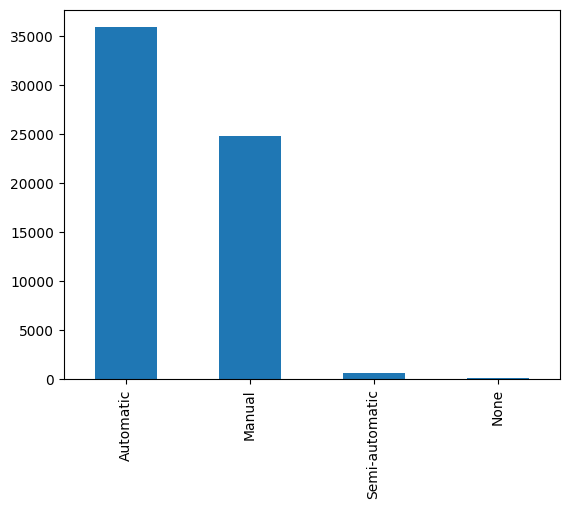

In [1207]:
df.Gearbox.value_counts(dropna = False).plot.bar()

# 8 colum name : registration

In [1208]:
df_origin['registration'].isna().sum()

37

In [1209]:
df['registration']=df['registration'].fillna('01/2023') # There are 37 values
df['registration'].isna().sum()

0

# 10 Column name : fuel_type  
Compared with the fuel_type column. The #Fuel_type column will remain, the other column can be deleted. In the comparison of the two columns, the None values in the Fuel_type matched with electric in the Fuel_type column, so the None values in the Fuel_type column were filled with Electric.

In [1210]:
df['Fuel_type'] = df['Fuel_type'].str.strip("\n\r,")
df['Fuel_type'].value_counts()

Gasoline                                        22377
Super 95                                        17309
Diesel                                          10527
None                                             8646
Diesel (Particle filter)                         1197
Super E10 95                                      404
LPG                                               305
Liquid petroleum gas (LPG)                        235
Gasoline (Particle filter)                        140
Electric                                           73
Domestic gas L                                     54
CNG                                                40
Super Plus 98                                      27
Super 95 (Particle filter)                         23
Hydogen                                            12
Ethanol                                             9
Regular/Benzine 91                                  4
Others                                              3
Electric (Particle filter)  

In [1211]:
df['fuel_type'] = df['fuel_type'].str.strip("\n\r,")
df['fuel_type'].value_counts()


Gasoline             36042
Diesel               11490
Electric/Gasoline     8062
Electric              4824
LPG                    541
Electric/Diesel        250
CNG                     95
Hydrogen                60
Ethanol                  9
Others                   7
Automatic                5
Manual                   3
Name: fuel_type, dtype: int64

In [1212]:
df.loc[(df['fuel_type'] == 'Automatic') | (df['fuel_type'] == 'Manual'),['fuel_type', 'Gearbox']] 
# those values are not belong to our "fuel_type" column therefore we checked other columns to see an opportunity


,fuel_type,Gearbox
15284,Manual,Manual
21624,Automatic,Automatic
29882,Manual,Manual
37355,Automatic,Automatic
37493,Manual,Manual
38045,Automatic,Automatic
55759,Automatic,Automatic
55764,Automatic,Automatic


In [1213]:
df.loc[(df['fuel_type'] != df['Fuel_type']), ['fuel_type', 'Fuel_type']]

,fuel_type,Fuel_type
0,Gasoline,Super 95
4,Gasoline,Super 95
5,Gasoline,Super 95
9,Gasoline,Super 95
11,Gasoline,Super 95
...,...,...
62755,LPG,Liquid petroleum gas (LPG)
62758,LPG,Liquid petroleum gas (LPG)
62759,LPG,Liquid petroleum gas (LPG)
62764,LPG,Liquid petroleum gas (LPG)


"Fuel_type" column has more detailed information but too many None values. So we decided to keep "fuel_type" column and drop other

In [1214]:
#df.drop("Fuel_type", inplace=False, axis=1)

# Data Control

In [1215]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,"110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n",Automatic,"\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n",Super 95,"\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,"92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n",Gasoline,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"
2,3,"BAARLE-NASSAU, NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450,145102,Automatic,06/2015,Gasoline,"92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,None,\n",\n5,\n5,"Country version,Netherlands",\n2601307,"\n,6 months,\n","[['\n'], ['']]",06/2015,2015,New,None,"\n,Yes,\n","\n,Yes,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n",Gasoline,"['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None
3,4,"ZUTPHEN, NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945,119666,Automatic,10/2015,Gasoline,"92 kW (125 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n4,\n3,"Country version,None",\nL-847-SK,"\n,6 months,\n","[['\n'], ['']]",10/2015,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,7,\n","\n,4,\n","\n,1,105 kg,\n",Gasoline,"['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...","\n,111 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather"
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,"110 kW (150 hp),","['\n', ['Dealer\n']]","\n,Compact,\n","\n,Used,\n","\n,Front,\n",\n5,\n5,"Country version,None",\nPZ-744-

# 11 Column name : power     
Compared with the #30 Power column. It was decided that it was appropriate to use hp as a unit. The unit expression will be added to the column.

In [1216]:
#'registration' has 7 "power" values
case_1 = ~df['registration'].str.match(r'\d{2}/\d{4}') # All values that is not in given format
case_1.value_counts()

False    61381
True         7
Name: registration, dtype: int64

In [1217]:
df.loc[case_1, ['power', 'registration']]  # Corresponding values of case_1 in "power" column. We see "registiration" column has "power" values

,power,registration
15284,"3,500 kg,",96 kW (131 hp)
29882,"2,159 kg,",75 kW (102 hp)
37355,"2,735 kg,",130 kW (177 hp)
37493,"1,588 kg,",90 kW (122 hp)
38045,"[None, '']",265 kW (360 hp)
55759,"[None, '']",96 kW (131 hp)
55764,"[None, '']",96 kW (131 hp)


In [1218]:
df.loc[case_1, 'power'] = None   # Clear the rows
df.loc[case_1, ['power', 'registration']] = df.loc[case_1,'registration'].apply(str) #writes values in "power" column
df.loc[case_1, ['power', 'registration']]

,power,registration
15284,96 kW (131 hp),96 kW (131 hp)
29882,75 kW (102 hp),75 kW (102 hp)
37355,130 kW (177 hp),130 kW (177 hp)
37493,90 kW (122 hp),90 kW (122 hp)
38045,265 kW (360 hp),265 kW (360 hp)
55759,96 kW (131 hp),96 kW (131 hp)
55764,96 kW (131 hp),96 kW (131 hp)


In [1219]:
df["power"] = df["power"].str.extract("(\d+)(?=\D*$)")
df["power"] = pd.to_numeric(df['power'], errors='coerce')
df['power'] = df['power'].replace(np.nan,df['power'].mean())
df['power'] = df["power"].astype(int) 


In [1220]:
df["power"].isna().sum()


0

In [1338]:
power_outliers = find_column_outliers(df,'power')
power_outliers

15       265
51       265
104      260
115      300
133      271
        ... 
62699    305
62700    286
62702    315
62704    286
62705    272
Name: power, Length: 5308, dtype: int32

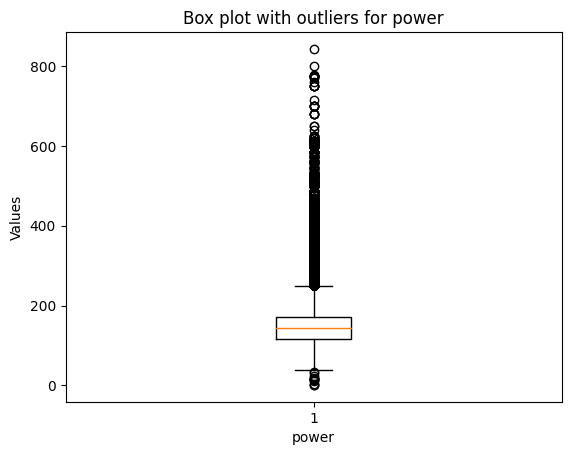

In [1340]:
draw_boxplot_with_outliers(df,'power')

# 12 Column Name : seller

In [1221]:
df['seller'] = df['seller'].str.lstrip("[', [' \s\S\t n ")
df['seller'] = df['seller'].str.rstrip("[', [] ' \s\S\t n")  


#seller has three not related unique values(electric, diesel , Gasoline) 
#bunlar diger sutunlara ait olabilir
df["seller"].replace("Diesel", None, inplace = True) 
df["seller"].replace("Electric", None, inplace = True) 
df["seller"].replace("Gasoline", None, inplace = True) 
df["seller"].value_counts()

Dealer            56050
Private seller     5330
Name: seller, dtype: int64

<AxesSubplot: >

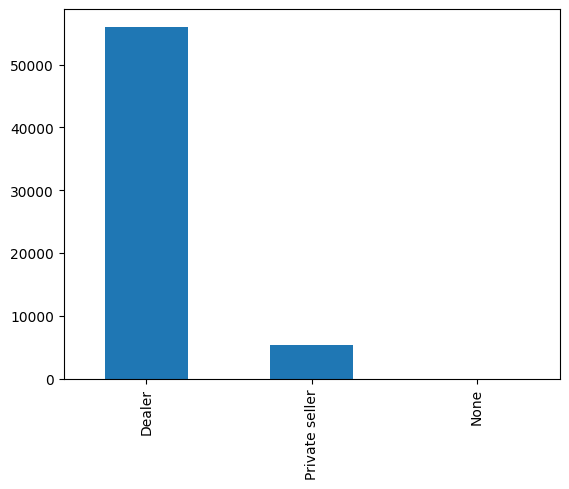

In [1222]:
df.seller.value_counts(dropna = False).plot.bar()

# 13 Column name: body_type   # None değerleri sayısı düşük olduğu için Other kısmına eklendi.

In [1223]:
df['body_type'] = df['body_type'].str.replace(',', '').str.strip()
 # 948 none values
df['body_type'] = df['body_type'].str.replace('None', 'Other')
df['body_type'].value_counts()

Off-Road/Pick-up    17059
Compact             12894
Station wagon       11038
Van                  6085
Sedan                5216
Convertible          3531
Transporter          2203
Coupe                1861
Other                1497
Panel van               2
Car transport           1
Flatbed van             1
Name: body_type, dtype: int64

# 14 Column name: type

In [1224]:
df['type'] = df['type'].str.replace(',', '').str.strip()
df['type'].value_counts()# 948 none values

Used              54275
New                3399
Demonstration      1792
Pre-registered      974
None                948
Name: type, dtype: int64

<AxesSubplot: >

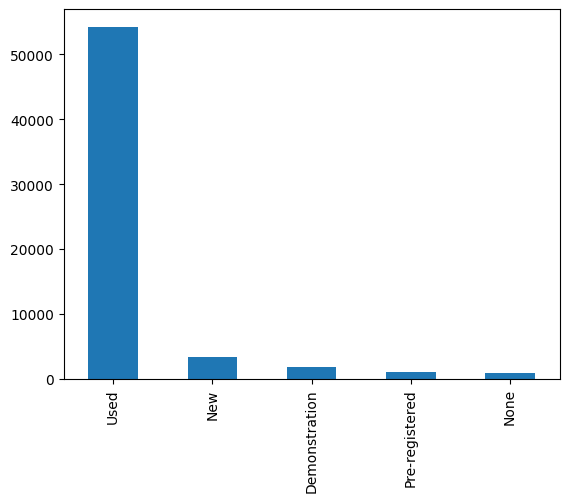

In [1225]:
df.type.value_counts(dropna = False).plot.bar()

# 15 Column name: drivetrain  
A literature study about drivetrain will be done. A value of 14594 none will be evaluated after scanning.

In [1226]:
df['drivetrain'] = df['drivetrain'].str.replace(',', '').str.strip()
df['drivetrain'].value_counts()

Front    32765
None     14325
4WD       7197
Rear      7101
Name: drivetrain, dtype: int64

<AxesSubplot: >

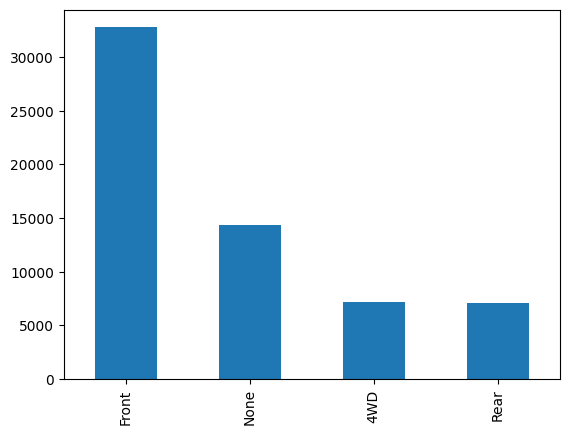

In [1227]:
df.drivetrain.value_counts(dropna = False).plot.bar()

# 16 Column Name: seats   

In [1228]:
df["seats"].unique()

array(['\n5', '\n4', 'None\n', '\n2', '\n6', '\n7', '\n3', '\n14', '\n9',
       '\n8', '\n1'], dtype=object)

In [1229]:
df["seats"]=df["seats"].str.strip(',\n')
df["seats"]= df["seats"].replace("None", np.nan)
df["seats"] = df["seats"].astype(float).astype(pd.Int64Dtype())
#df["seats"] = pd.to_numeric(df["seats"], errors='coerce')

In [1230]:
df["seats"].isna().sum()

4841

In [1231]:
df["seats"].head()

0    5
1    5
2    5
3    4
4    5
Name: seats, dtype: Int64

# 17 Column Name: doors   


In [1232]:
df["doors"].unique()

array(['\n3', '\n5', '\n4', 'None\n', '\n2', '\n6', '\n1'], dtype=object)

In [1233]:

df["doors"]=df["doors"].str.strip(',\n')
df["doors"].replace("None", np.nan) #None values may stay as None. There are no car without door
df["doors"] = pd.to_numeric(df['doors'], errors='coerce')
df["doors"].head()


0    3.0
1    5.0
2    5.0
3    3.0
4    5.0
Name: doors, dtype: float64

In [1234]:
df["doors"] = df["doors"].astype(float).astype(pd.Int64Dtype())

df["doors"].isna().sum()


1160

In [1235]:
df["doors"].head()

0    3
1    5
2    5
3    3
4    5
Name: doors, dtype: Int64

<AxesSubplot: >

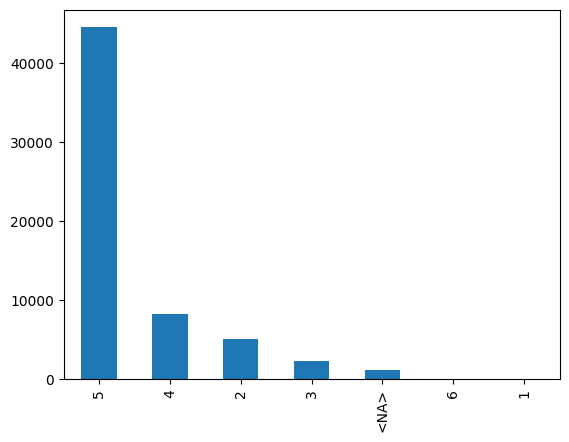

In [1236]:
df.doors.value_counts(dropna = False).plot.bar()

In [1237]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,150,Dealer,Compact,Used,Front,5,3,"Country version,None",\nSJ-112-R,"\n,6 months,\n","[['\n'], ['']]",08/2003,None,05/2022,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n",Automatic,"\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n",Super 95,"\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth"
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,125,Dealer,Compact,Used,Front,5,5,"Country version,None",\n809725,"\n,None,\n","[['\n'], ['']]",10/2013,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n",Gasoline,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth"
2,3,"BAARLE-NASSAU, NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450,145102,Automatic,06/2015,Gasoline,125,Dealer,Compact,Used,None,5,5,"Country version,Netherlands",\n2601307,"\n,6 months,\n","[['\n'], ['']]",06/2015,2015,New,None,"\n,Yes,\n","\n,Yes,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n",Gasoline,"['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None
3,4,"ZUTPHEN, NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945,119666,Automatic,10/2015,Gasoline,125,Dealer,Compact,Used,Front,4,3,"Country version,None",\nL-847-SK,"\n,6 months,\n","[['\n'], ['']]",10/2015,None,None,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,7,\n","\n,4,\n","\n,1,105 kg,\n",Gasoline,"['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...","\n,111 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather"
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,150,Dealer,Compact,Used,Front,5,5,"Country version,None",\nPZ-744-H,"\n,6 months,\n","[['\n'], ['']]",10/2017,None,11/2023,None,"\n,Yes,\n","\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n",Automatic,"\n,1,495 cc,\n","\n,7,\n","\n,4,\n","\n,1,215 kg,\n",Super 95,"['\n', ['5 l/100 km (comb.)', '6.2 l/100 km (c...","\n,113 g/km (

# 18 Column Name: country_version   #54824 None values

In [1238]:
df['country_version'] = df['country_version'].str.split(',').str[-1].str.strip()
df['country_version'].value_counts()

None                    53650
Netherlands              6665
Germany                   747
Belgium                   102
Sweden                     50
Denmark                    36
Czechia                    19
France                     19
Spain                      16
Italy                      13
United States              13
Switzerland                13
Poland                     12
Austria                     9
Luxembourg                  6
Slovenia                    4
Japan                       2
Canada                      2
United Kingdom              2
Hungary                     2
Latvia                      1
Romania                     1
Estonia                     1
Namibia                     1
Lithuania                   1
United Arab Emirates        1
Name: country_version, dtype: int64

In [1239]:
#df.drop("country_version", inplace=False, axis=1)

# 19 Column name : offer_number
* Literature information was reviewed at allecijfers.nl - autoweek.nl - bovag.nl - autotrader.nl. No record found. No action was taken because there was no value affecting the analysis.

In [1240]:
df["offer_number"]= df["offer_number"].str.strip(',\n')
df["offer_number"].value_counts()

None        9867
NIEUW         53
XX            28
.             17
1776          13
            ... 
N-652-PX       1
7157           1
30035574       1
#37766         1
26-HN-LS       1
Name: offer_number, Length: 48890, dtype: int64

In [1241]:
#df.drop("offer_number", inplace=False, axis=1)

# 20 Column name : warranty # A literature review was conducted and it was decided to categorize the values.

In [1242]:
df['warranty'] = df['warranty'].str.replace(',', '').str.strip()
df['warranty'].value_counts()

None         40661
6 months     16282
3 months      1602
12 months     1336
24 months     1007
1 months       235
84 months      204
18 months       29
36 months        8
48 months        6
2 months         6
Yes              3
60 months        3
26 months        2
9 months         2
10 months        1
4 months         1
Name: warranty, dtype: int64

In [1243]:
# Categorize the values in the column. Since 2004-2006 model 3 is data, "Yes" values are added to "1-3 year" category.
category1 = ['1 months', '2 months', '4 months', '3 months', '6 months', '9 months', '10 months', '12 months', '18 months', '24 months', 'Yes']
category2 = ['26 months', '36 months', '48 months', '60 months']
category3 = ['84 months']

# Let's create a column classified by categories
df['warranty_category'] = pd.cut(pd.to_numeric(df['warranty'].str.extract('(\d+)', expand=False)), 
                                  bins=[0, 37, 72, 1000], 
                                  labels=['1-3 year    :', '3-6 year    :', 'Over 6 years:'])

df['warranty_category'].value_counts()

1-3 year    :    20511
Over 6 years:      204
3-6 year    :        9
Name: warranty_category, dtype: int64

# 21 Column name : Mileage    There are 2 Mileage columns in #Data and there is no information in this column, so it was dropped.

In [1244]:
df['Mileage'].unique()

array(["[['\\n'], ['']]", "[['\\n'], ['None']]"], dtype=object)

In [1245]:
#df.drop("Mileage", inplace=False, axis=1)

# 22 Column name: First_registration and #9 registration were checked in harmony with each other and a column was dropped.

In [1246]:
df['first_registration'].value_counts()


01/2021    2857
01/2022    1282
12/2016     713
03/2021     709
12/2020     627
           ... 
04/1997       1
07/1998       1
04/1999       1
05/1997       1
10/1996       1
Name: first_registration, Length: 298, dtype: int64

# 23 Column Name : The production_date and #9 registration values are compatible with each other, so none values are filled with the values in the registration.

In [1247]:

#There is a link between #producton_date and registration. Years are the same. We can fill it here
df['production_date'] = df['production_date'].fillna("None")
df.loc[(df['production_date'] == "None"), ['production_date']] =df.loc[(df['production_date'] == "None"), 'registration'].apply(lambda x: x.split('/')[1] if len(x.split('/')) > 1 else None)


In [1248]:
df_origin.loc[(df_origin['production_date'] == "None"), ['production_date', 'registration']]

,production_date,registration
0,None,08/2003
1,None,10/2013
3,None,10/2015
4,None,10/2017
5,None,03/2019
...,...,...
62761,None,12/2000
62762,None,02/2005
62763,None,08/2004
62764,None,01/2004


In [1249]:
df[ ['production_date', 'registration']]

,production_date,registration
0,2003,08/2003
1,2013,10/2013
2,2015,06/2015
3,2015,10/2015
4,2017,10/2017
...,...,...
62761,2000,12/2000
62762,2005,02/2005
62763,2004,08/2004
62764,2004,01/2004


In [1250]:
df["production_date"].isna().sum()

5

In [1251]:
df["production_date"] = df["production_date"].fillna("2023")
df["production_date"] = df["production_date"].astype(int)


In [1252]:
df["production_date"]

0        2003
1        2013
2        2015
3        2015
4        2017
         ... 
62761    2000
62762    2005
62763    2004
62764    2004
62765    2001
Name: production_date, Length: 61388, dtype: int32

# 24 Column Name : general_inspection The new value #15532 exists. The New Values are filled as 2023.

In [1253]:
df['general_inspection'] = df['general_inspection'].str.replace('New', '01/2023')
df["general_inspection"].unique()
df["general_inspection"].value_counts()

01/2023    15953
None       14769
06/2022     2114
03/2022     1964
05/2022     1889
           ...  
07/2026        1
11/2017        1
11/2019        1
11/2014        1
12/2019        1
Name: general_inspection, Length: 93, dtype: int64

# 25 Column Name : last_service               #column only has nan value. Drop done.

In [1254]:
df['last_service'].unique()

array(['None'], dtype=object)

In [1255]:
#df.drop("last_service", inplace=False, axis=1)

# 26 Column Name: full_service_history  # Changed to 0 and 1.

In [1256]:
df['full_service_history'] = df['full_service_history'].str.replace(',', '').str.strip()
df['full_service_history'].value_counts()


Yes     42057
None    19331
Name: full_service_history, dtype: int64

#  full_service_encoded The values in the column are written as 1-0.

In [1257]:
from sklearn.preprocessing import LabelEncoder          
lbe=LabelEncoder()
lbe.fit_transform(df["full_service_history"])

df['full_service_encoded']=lbe.fit_transform(df["full_service_history"])
df['full_service_encoded']

0        1
1        1
2        1
3        1
4        1
        ..
62761    1
62762    1
62763    1
62764    0
62765    0
Name: full_service_encoded, Length: 61388, dtype: int32

# Data Control

In [1258]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery,warranty_category,full_service_encoded
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,150,Dealer,Compact,Used,Front,5,3,None,SJ-112-R,6 months,"[['\n'], ['']]",08/2003,2003,05/2022,None,Yes,"\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n",Automatic,"\n,1,984 cc,\n","\n,None,\n","\n,4,\n","\n,1,280 kg,\n",Super 95,"\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",1-3 year :,1
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,125,Dealer,Compact,Used,Front,5,5,None,809725,None,"[['\n'], ['']]",10/2013,2013,None,None,Yes,"\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,1,200 kg,\n",Gasoline,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth",NaN,1
2,3,"BAARLE-NASSAU, NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450,145102,Automatic,06/2015,Gasoline,125,Dealer,Compact,Used,None,5,5,Netherlands,2601307,6 months,"[['\n'], ['']]",06/2015,2015,01/2023,None,Yes,"\n,Yes,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,None,\n","\n,4,\n","\n,None,\n",Gasoline,"['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None,1-3 year :,1
3,4,"ZUTPHEN, NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945,119666,Automatic,10/2015,Gasoline,125,Dealer,Compact,Used,Front,4,3,None,L-847-SK,6 months,"[['\n'], ['']]",10/2015,2015,None,None,Yes,"\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,92 kW (125 hp),\n",Automatic,"\n,1,395 cc,\n","\n,7,\n","\n,4,\n","\n,1,105 kg,\n",Gasoline,"['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...","\n,111 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather",1-3 year :,1
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,150,Dealer,Compact,Used,Front,5,5,None,PZ-744-H,6 months,"[['\n'], ['']]",10/2017,2017,11/2023,None,Yes,"\n,None,\n","[['\n'], ['None']]","[['\n'], ['None']]","\n,110 kW (150 hp),\n",Automatic,"\n,1,495 cc,\n","\n,7,\n","\n,4,\n","\n,1,215 kg,\n",Super 95,"['\n', ['5 l/100 km (comb.)', '6.2 l/100 km (c...","\n,113 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Electrical s...","

# 27 Column Name : non_smoker_vehicle Changed #dtype to int and changed to 0 and 1.

In [1259]:
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].str.replace(',', '').str.strip()
df['non_smoker_vehicle'].value_counts()

None    56455
Yes      4933
Name: non_smoker_vehicle, dtype: int64

# non_smoker_encoded The values in the column are written as 1-0.

In [1260]:
lbe.fit_transform(df["non_smoker_vehicle"])

array([0, 0, 1, ..., 0, 0, 0])

In [1261]:
df['non_smoker_encoded']=lbe.fit_transform(df["non_smoker_vehicle"])
df['non_smoker_encoded']

0        0
1        0
2        1
3        0
4        0
        ..
62761    0
62762    0
62763    0
62764    0
62765    0
Name: non_smoker_encoded, Length: 61388, dtype: int32

# 28 Column Name : previous_owner

In [1262]:
df['previous_owner'] = df['previous_owner'].str.lstrip("[' \s\S\t n ',]")
df['previous_owner'] = df['previous_owner'].str.rstrip("['\s,]")
df['previous_owner'].value_counts()

None    57066
1        2640
2        1145
3         347
4         121
5          38
6          14
7           7
8           6
9           2
12          1
10          1
Name: previous_owner, dtype: int64

# 29 Column Name : last_timing_belt_change  # 61925 Since the value None means it never changes, it was thought to be filled with the production date.

In [1263]:
df['last_timing_belt_change'] = df['last_timing_belt_change'].str.lstrip(" [',] '\a \s\S\t\r n ' ")
df['last_timing_belt_change'] = df['last_timing_belt_change'].str.rstrip(" [',] '\a \s\S\t\r n ' ")

df['last_timing_belt_change'].unique()
df['last_timing_belt_change'].value_counts()

None       60549
06/2021       41
05/2021       31
10/2021       31
09/2021       28
           ...  
02/2015        1
04/2016        1
06/2014        1
04/2015        1
11/2015        1
Name: last_timing_belt_change, Length: 82, dtype: int64

# However, when the comparison was made, it was seen that the first registration date was also old and it was decided that this process would not be correct.

In [1264]:
df.loc[(df['last_timing_belt_change'] == 'None'), ['last_timing_belt_change', 'first_registration']][:10]

,last_timing_belt_change,first_registration
0,None,08/2003
1,None,10/2013
2,None,06/2015
3,None,10/2015
4,None,10/2017
5,None,03/2019
6,None,03/2014
7,None,07/2011
8,None,08/2012
9,None,01/2011


In [1265]:
df['last_timing_belt_change'].isnull().sum()

0

# 30 Column Name : Power We delete this column because it is duplicate

In [1266]:
df["Power"].describe()


count          61388
unique           357
top       \n,None,\n
freq            5263
Name: Power, dtype: object

In [1267]:
df_origin["power"].describe()

count          62766
unique           361
top       [None, '']
freq            5333
Name: power, dtype: object

In [1268]:
#df.drop("Power", inplace=False, axis=1)

# 31 Column Name: Gearbox   have the same column

In [1269]:
df['gearbox'] == df['Gearbox']

0        True
1        True
2        True
3        True
4        True
         ... 
62761    True
62762    True
62763    True
62764    True
62765    True
Length: 61388, dtype: bool

# 32 Column Name : engine_size   
 dtype int e cevrilecek. 5143 None değeri var
 99 '0' cc degeri var. 
none cevirme kodunu düzenleyince 0 degrlerden none ekleniyor.
df["engine_size"].replace(0, np.nan, inplace=True)

In [1270]:
# Edit to include numbers only
df['engine_size'] = df['engine_size'].replace({'[^0-9]':''}, regex=True)

# Change empty data to NaN
df['engine_size'] = df['engine_size'].replace('', np.nan)

# Change data type to int
df['engine_size'] = df['engine_size'].astype('Int64')

df['engine_size'].value_counts()



1598    4216
1998    2581
999     2213
1199    2202
1395    2041
        ... 
3596       1
2          1
3604       1
1716       1
200        1
Name: engine_size, Length: 443, dtype: Int64

In [1271]:

df["engine_size"].isna().sum()

5059

# Data Control

In [1272]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,\nComfort & Convenience\n,\nEntertainment & Media\n,\nSafety & Security\n,extras,\ncolour,\nmanufacturer_color,\npaint,upholstery_colour,upholstery,warranty_category,full_service_encoded,non_smoker_encoded
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,150,Dealer,Compact,Used,Front,5,3,None,SJ-112-R,6 months,"[['\n'], ['']]",08/2003,2003,05/2022,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1984,"\n,None,\n","\n,4,\n","\n,1,280 kg,\n",Super 95,"\n,None,\n","['\n', [' ', ' ', ' '], '\n']","\n,Euro 4,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'Radio']]","[['ABS', 'Alarm system', 'Central door lock', ...",[['Alloy wheels']],"\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",1-3 year :,1,0
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,125,Dealer,Compact,Used,Front,5,5,None,809725,None,"[['\n'], ['']]",10/2013,2013,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,"\n,None,\n","\n,4,\n","\n,1,200 kg,\n",Gasoline,"['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Automatic climate contr...","[['CD player', 'Radio']]","[['Alarm system', 'Central door lock', 'Centra...","[['Alloy wheels (16"")']]","\n4, White",None,None,"\nupholstery, Black","\n8, Cloth",NaN,1,0
2,3,"BAARLE-NASSAU, NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450,145102,Automatic,06/2015,Gasoline,125,Dealer,Compact,Used,None,5,5,Netherlands,2601307,6 months,"[['\n'], ['']]",06/2015,2015,01/2023,None,Yes,Yes,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,"\n,None,\n","\n,4,\n","\n,None,\n",Gasoline,"['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...","\n,None,\n","\n,None,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['Bluetooth', 'CD player', 'On-board computer...","[['ABS', 'Central door lock with remote contro...","[['Alloy wheels (15"")']]","\n4, Grey",None,"\npaint, Metallic",None,None,1-3 year :,1,1
3,4,"ZUTPHEN, NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945,119666,Automatic,10/2015,Gasoline,125,Dealer,Compact,Used,Front,4,3,None,L-847-SK,6 months,"[['\n'], ['']]",10/2015,2015,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,"\n,7,\n","\n,4,\n","\n,1,105 kg,\n",Gasoline,"['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...","\n,111 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Automatic cl...","[['CD player', 'MP3', 'On-board computer', 'Ra...","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Shift paddles', 'Spor...","\n4, Black",None,None,"\nupholstery, Black","\n8, Part leather",1-3 year :,1,0
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,150,Dealer,Compact,Used,Front,5,5,None,PZ-744-H,6 months,"[['\n'], ['']]",10/2017,2017,11/2023,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1495,"\n,7,\n","\n,4,\n","\n,1,215 kg,\n",Super 95,"['\n', ['5 l/100 km (comb.)', '6.2 l/100 km (c...","\n,113 g/km (comb.),\n","\n,Euro 6,\n","\n,None,\n","[['Air conditioning', 'Armrest', 'Electrical s...","[['CD player', 'On-board computer', 'Radio']]","[['ABS', 'Alarm system', 'Bi-Xenon headlights'...","[['Alloy wheels (17"")', 'Sport seats', 'Sport ...","\n4, Grey",None,"\npaint, Metallic","\nupholstery, Black","\n8, Cloth",1-3 year 

# 33 Column Name : gears  # 18184 none values

In [1273]:
df["gears"]=df["gears"].str.strip(',\n,')
df["gears"].unique()
df["gears"].value_counts()

6       18362
None    17850
5       10582
7        6743
8        4797
1        1533
9         872
4         604
2          37
3           8
Name: gears, dtype: int64

In [1274]:
df.loc[(df['gears'] == 'None'), ['gears', 'model']][:15]

,gears,model
0,None,A3
1,None,A3
2,None,A1
5,None,A3
7,None,A3
8,None,A1
12,None,A5
13,None,A1
14,None,A5
20,None,A3


In [1275]:
for index, row in df.iterrows():
    if pd.isnull(row['gears']):
        model = row['model']
        # Fill the gear information according to the model information
        df.at[index, 'gears'] = f"{model} vites"

In [1276]:
df["gears"].value_counts()

6       18362
None    17850
5       10582
7        6743
8        4797
1        1533
9         872
4         604
2          37
3           8
Name: gears, dtype: int64

# 34 Column Name: cylinders  5532 None values

none values can be populated with mode. The median and mode values may be very close or remain as none.
df["cylinders"]= df["cylinders"].fillna(df["cylinders"].mode()[0])

In [1277]:
df["cylinders"]=df["cylinders"].str.strip(',\n,')
df["cylinders"] = pd.to_numeric(df["cylinders"], errors='coerce')
df["cylinders"].fillna(df["cylinders"].mean(), inplace=True)
df["cylinders"] = df["cylinders"].astype(int)

In [1278]:
df["cylinders"].head()

0    4
1    4
2    4
3    4
4    4
Name: cylinders, dtype: int32

#  35 Column Name : empty_weight

In [1279]:
df_origin["empty_weight"].head()

0    \n,1,280 kg,\n
1    \n,1,200 kg,\n
2        \n,None,\n
3    \n,1,105 kg,\n
4    \n,1,215 kg,\n
Name: empty_weight, dtype: object

In [1280]:
df["empty_weight"]=df["empty_weight"].str.strip('[\n,')
df["empty_weight"]=df["empty_weight"].str.replace(' kg', '').str.replace(',', '')
df["empty_weight"].head()

0    1280
1    1200
2    None
3    1105
4    1215
Name: empty_weight, dtype: object

In [1281]:
df["empty_weight"] = df["empty_weight"].replace('None' , np.nan)
df["empty_weight"] = df["empty_weight"].astype(float).astype(pd.Int64Dtype())

df["empty_weight"].isna().sum()

1387

In [1282]:
df["empty_weight"].head()

0    1280
1    1200
2    <NA>
3    1105
4    1215
Name: empty_weight, dtype: Int64

# 36 Column Name: Fuel_type

In [1283]:
df["Fuel_type"]=df["Fuel_type"].str.strip('[\n,')
df["Fuel_type"].head(15)

0     Super 95
1     Gasoline
2     Gasoline
3     Gasoline
4     Super 95
5     Super 95
6     Gasoline
7     Gasoline
8     Gasoline
9     Super 95
10    Gasoline
11    Super 95
12    Gasoline
13    Super 95
14    Gasoline
Name: Fuel_type, dtype: object

# 37 Column name : fuel_consumption # city -country and comb. columns will be created.

In [1284]:
df['fuel_consumption'] = df['fuel_consumption'].str.lstrip(" [', \s\S\t\r\n,n ' ")
df['fuel_consumption'] = df['fuel_consumption'].str.rstrip("[', '] \s\S\t\r\n,\\n  ")
df['fuel_consumption'] = df['fuel_consumption'].str.replace("'","")
df['fuel_consumption']

0                                                     None
1                                     4.9 l/100 km (comb.)
2        0 l/100 km (comb.), 0 l/100 km (city), 0 l/100...
3        4.8 l/100 km (comb.), 5.9 l/100 km (city), 4.2...
4        5 l/100 km (comb.), 6.2 l/100 km (city), 4.3 l...
                               ...                        
62761                                                 None
62762                                                 None
62763    9.1 l/100 km (comb.), 12.6 l/100 km (city), 7 ...
62764                                                 None
62765    8.4 l/100 km (comb.), 11.6 l/100 km (city), 6....
Name: fuel_consumption, Length: 61388, dtype: object

# create fuel_cons_comb column

In [1285]:
df['fuel_cons_comb'] = df['fuel_consumption'].str.split(',').str.get(0)
df['fuel_cons_comb'].head()

0                    None
1    4.9 l/100 km (comb.)
2      0 l/100 km (comb.)
3    4.8 l/100 km (comb.)
4      5 l/100 km (comb.)
Name: fuel_cons_comb, dtype: object

In [1286]:
df['fuel_cons_comb'] = df['fuel_cons_comb'].str.replace("l/100 km (comb.)","")
df["fuel_cons_comb"]

C:\Users\User\AppData\Local\Temp\ipykernel_4216\2522665367.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['fuel_cons_comb'] = df['fuel_cons_comb'].str.replace("l/100 km (comb.)","")


0                        None
1        4.9 l/100 km (comb.)
2          0 l/100 km (comb.)
3        4.8 l/100 km (comb.)
4          5 l/100 km (comb.)
                 ...         
62761                    None
62762                    None
62763    9.1 l/100 km (comb.)
62764                    None
62765    8.4 l/100 km (comb.)
Name: fuel_cons_comb, Length: 61388, dtype: object

# create fuel_cons_city column

In [1287]:
df['fuel_cons_city'] = df['fuel_consumption'].str.split(',').str.get(1)
df['fuel_cons_city'].head()

0                     NaN
1                     NaN
2       0 l/100 km (city)
3     5.9 l/100 km (city)
4     6.2 l/100 km (city)
Name: fuel_cons_city, dtype: object

In [1288]:
df['fuel_cons_city'] = df['fuel_cons_city'].str.replace("l/100 km (city)","")
df["fuel_cons_city"].head()

C:\Users\User\AppData\Local\Temp\ipykernel_4216\285854044.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['fuel_cons_city'] = df['fuel_cons_city'].str.replace("l/100 km (city)","")


0                     NaN
1                     NaN
2       0 l/100 km (city)
3     5.9 l/100 km (city)
4     6.2 l/100 km (city)
Name: fuel_cons_city, dtype: object

# create fuel_cons_country column

In [1289]:
df['fuel_cons_country'] = df['fuel_consumption'].str.split(',').str.get(2)
df['fuel_cons_country'].head()

0                        NaN
1                        NaN
2       0 l/100 km (country)
3     4.2 l/100 km (country)
4     4.3 l/100 km (country)
Name: fuel_cons_country, dtype: object

In [1290]:
df['fuel_cons_country'] = df['fuel_cons_country'].str.replace("l/100 km (country)","")
df["fuel_cons_country"].head() 

C:\Users\User\AppData\Local\Temp\ipykernel_4216\3745580030.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['fuel_cons_country'] = df['fuel_cons_country'].str.replace("l/100 km (country)","")


0                        NaN
1                        NaN
2       0 l/100 km (country)
3     4.2 l/100 km (country)
4     4.3 l/100 km (country)
Name: fuel_cons_country, dtype: object

# 38 Column Name: co2_emissions

In [1291]:
df["co2_emissions"]=df["co2_emissions"].str.strip('\n,')
df["co2_emissions"]=df["co2_emissions"].str.split().str[0]

In [1292]:
df["co2_emissions"] = pd.to_numeric(df["co2_emissions"], errors='coerce')
df["co2_emissions"].fillna(df["co2_emissions"].mean(), inplace=True)
df["co2_emissions"] = df["co2_emissions"].astype(int)
df['co2_emissions'].isna().sum()


0

In [1293]:
df["co2_emissions"].head()

0    128
1    128
2    128
3    111
4    113
Name: co2_emissions, dtype: int32

# 39 Column Name : emission_class  

In [1294]:
df['emission_class'] = df['emission_class'].apply(lambda x: x.replace('\r\n','').strip())
df['emission_class'] = df['emission_class'].str.strip(',.\'[]" ')
df['emission_class'].replace("\\n', [' ', ' ', ' '], '\\n", "None", inplace=True)
#df["emission_class"].replace("None", None, inplace = True)

df['emission_class'].value_counts()
# df.emission_class.value_counts(dropna = True).plot.bar()

None            19318
Euro 6          19296
Euro 5          10349
Euro 4           7490
Euro 6d-TEMP     2640
Euro 3           1676
Euro 1            455
Euro 2            127
Euro 6c            20
Euro 6d            17
Name: emission_class, dtype: int64

# 40 Column Name: emissions_sticker          #droped.

After the literature review, it was learned that using emission_sticker is mandatory in Europe. However, due to the high percentage of cars, the emission_sticker rates of cars are not high yet. For this reason, it was not included in the analysis.

In [1295]:
df["emissions_sticker"].unique()

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array(['\n,None,\n', '\n,4 (Green),\n', '\n,3 (Yellow),\n',
       '\n,1 (No sticker),\n', "['\\n', [' ', ' ', ' '], '\\n']",
       '\n,2 (Red),\n'], dtype=object)

In [1296]:
df["emissions_sticker"] = df["emissions_sticker"].str.rstrip(" [',] \s\S\t\r\n ' ")
df["emissions_sticker"] = df["emissions_sticker"].str.lstrip(" [',] \s\S\t\r\n ' ")
df["emissions_sticker"] = df["emissions_sticker"].str.strip(",")
df["emissions_sticker"] = df["emissions_sticker"].str.replace("n","None")
df["emissions_sticker"].value_counts()

NoNonee                           61254
4 (GreeNone)                        106
1 (No sticker)                       12
None', [' ', ' ', ' '], '\None       11
3 (Yellow)                            4
2 (Red)                               1
Name: emissions_sticker, dtype: int64

In [1297]:
#df.drop("emissions_sticker", inplace=False, axis=1)

# 41 Column Name : Comfort & Convenience   #Air Conditioning -Cruise control columns will be created and arranged as 0-1.

In [1298]:
df.rename({"\nComfort & Convenience\n":"comfort_convenience"}, inplace = True, axis = 1) # sütun isminde \n değerleri olduğu için kalıcı oalrak sütun ismi değiştirildi.
df["comfort_convenience"] = df["comfort_convenience"].str.rstrip(" [', \s\S\t\r n ' ")
df["comfort_convenience"] = df["comfort_convenience"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df["comfort_convenience"] = df["comfort_convenience"].str.replace("'","")
df["comfort_convenience"].unique()

array(['Air conditioning, Armrest, Automatic climate control, Electrical side mirrors, Navigation system, Power windows, Sunroof]]',
       'Air conditioning, Automatic climate control, Electrical side mirrors, Light sensor, Power windows, Rain sensor]]',
       'Air conditioning, Armrest, Automatic climate control, Cruise control, Navigation system, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Split rear seats]]',
       ...,
       'Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Electrically adjustable seats, Leather steering wheel, Parking assist system sensors rear, Rain sensor, Seat heating]]',
       'Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Parking assist system sensors rear, Power windows, Rain sensor, Sunroof]]',
       'Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Navigatio

# air_conditioning Column created and filled as 1-0.

In [1299]:


df['air_conditioning'] = df['comfort_convenience'].str.split(',').str.get(0)

df['air_conditioning'].head()

#df['air_conditioning1'] = df['air_conditioning1'].fillna("None")
#df.loc[(df['air_conditioning1'] != 'None'), ['air_conditioning1', 'air_conditioning']]

0    Air conditioning
1    Air conditioning
2    Air conditioning
3    Air conditioning
4    Air conditioning
Name: air_conditioning, dtype: object

In [1300]:
lbe.fit_transform(df["air_conditioning"])

array([1, 1, 1, ..., 1, 1, 1])

In [1301]:
df['air_conditioning']=lbe.fit_transform(df["air_conditioning"])
df['air_conditioning'].head()

0    1
1    1
2    1
3    1
4    1
Name: air_conditioning, dtype: int32

# cruise_control value is in a different order in the column, it was examined how many values it took place.

In [1302]:
search_value = 'Cruise control'

# selecting the relevant rows by searching inside the column
search_result = df[df['comfort_convenience'].str.contains(search_value)]

# print the search result
if not search_result.empty:
    print(f"The number you are looking for ({search_value}) available in the rows in the dataset:")
    print(search_result)
else:
    print(f"The number you are looking for({search_value}) vnot available in the rows in the dataset.")

The number you are looking for (Cruise control) available in the rows in the dataset:
       Unnamed: 0                 location    make model  \
2               3        BAARLE-NASSAU, NL   Audi     A1   
3               4              ZUTPHEN, NL   Audi     A1   
5               8                WEZEP, NL   Audi     A3   
7              10               HEESCH, NL   Audi     A3   
9              12          NIJKERK GLD, NL   Audi     A3   
...           ...                      ...     ...   ...   
62760       71097              KLIMMEN, NL  Volvo    S40   
62761       71098           Etten-Leur, NL  Volvo    S60   
62762       71099  HENDRIK-IDO-AMBACHT, NL  Volvo    S60   
62763       71101             LELYSTAD, NL  Volvo    S60   
62765       71103          SOESTERBERG, NL  Volvo    S60   

                                       short_description  price  mileage  \
2        1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.  12450   145102   
3      S-Line | Automaat | Navigatie | Cr

Listenin 1. indexinde 3876 satırda mevcut

In [1303]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(1)

df['cruise_control'].value_counts()

 Armrest                                40191
 Automatic climate control              10235
 Cruise control                          3795
 Air suspension                          2273
 Electrical side mirrors                 2241
                                        ...  
 Seat ventilation]]                         1
 Electrically heated windshield]]           1
 Parking assist system self-steering        1
 Keyless central door lock]]                1
 Electrically adjustable seats]]            1
Name: cruise_control, Length: 63, dtype: int64

Available in 12999 rows in the 2nd index of the list

In [1304]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(2)

#df['cruise_control'].value_counts()

Available in 31690 rows in the 3rd index of the list

In [1305]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(3)

#df['cruise_control'].value_counts()

Available in 4106  rows in the 4th index of the list

In [1306]:
df['cruise_control'] = df['comfort_convenience'].str.split(',').str.get(4)

#df['cruise_control'].value_counts()

# 42 Column Name : Entertaiment & Media   #Bluetooth column will be created and arranged as 0 and 1.

In [1307]:
df['\nEntertainment & Media\n'].unique()

array(["[['CD player', 'Radio']]",
       "[['Bluetooth', 'CD player', 'On-board computer', 'USB']]",
       "[['CD player', 'MP3', 'On-board computer', 'Radio']]", ...,
       "[['Android Auto', 'Apple CarPlay', 'Digital cockpit', 'Induction charging for smartphones', 'MP3', 'On-board computer', 'Radio', 'USB']]",
       "[['Apple CarPlay', 'CD player', 'On-board computer', 'Radio', 'Sound system']]",
       "[['Android Auto', 'Apple CarPlay', 'Bluetooth', 'CD player', 'Digital cockpit', 'Digital radio', 'Hands-free equipment', 'Induction charging for smartphones', 'Integrated music streaming', 'On-board computer', 'Radio', 'Sound system', 'USB']]"],
      dtype=object)

In [1308]:
df.rename({"\nEntertainment & Media\n":"entertainment_media"},inplace = True, axis = 1)# sütun isminde \n değerleri olduğu için kalıcı oalrak sütun ismi değiştirildi.
df["entertainment_media"] = df["entertainment_media"].str.rstrip(" [',] \s\S\t\r n ' ")
df["entertainment_media"] = df["entertainment_media"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df["entertainment_media"] =  df["entertainment_media"].str.replace("'","")
df["entertainment_media"].unique()

array(['CD player, Radio', 'Bluetooth, CD player, On-board computer, USB',
       'CD player, MP3, On-board computer, Radio', ...,
       'Android Auto, Apple CarPlay, Digital cockpit, Induction charging for smartphones, MP3, On-board computer, Radio, USB',
       'Apple CarPlay, CD player, On-board computer, Radio, Sound system',
       'Android Auto, Apple CarPlay, Bluetooth, CD player, Digital cockpit, Digital radio, Hands-free equipment, Induction charging for smartphones, Integrated music streaming, On-board computer, Radio, Sound system, USB'],
      dtype=object)

In [1309]:
search_value = 'Bluetooth'

# selecting the relevant rows by searching inside the column
search_result = df[df['entertainment_media'].str.contains(search_value)]

# print the search result
if not search_result.empty:
    print(f"The number you are looking for ({search_value}) available in the rows in the dataset:")
    print(search_result)
else:
    print(f"The number you are looking for({search_value}) vnot available in the rows in the dataset.")

The number you are looking for (Bluetooth) available in the rows in the dataset:
       Unnamed: 0                    location    make model  \
2               3           BAARLE-NASSAU, NL   Audi     A1   
7              10                  HEESCH, NL   Audi     A3   
8              11  VALKENBURG AAN DE GEUL, NL   Audi     A1   
17             22               Oldenzaal, NL   Audi     A5   
20             26              Ridderkerk, NL   Audi     A3   
...           ...                         ...     ...   ...   
62691       71023                Enschede, NL  Volvo    V60   
62708       71042              LOENEN GLD, NL  Volvo    V70   
62714       71048                 HENGELO, NL  Volvo    V70   
62728       71064                   ASSEN, NL  Volvo    V70   
62755       71092                  Zetten, NL  Volvo    S80   

                                       short_description  price  mileage  \
2        1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.  12450   145102   
7         

In [1310]:
df['bluetooth'] = df['entertainment_media'].str.split(',').str.get(0)

df['bluetooth'].head()

0    CD player
1    CD player
2    Bluetooth
3    CD player
4    CD player
Name: bluetooth, dtype: object

# 43 Column Name : Safety & Security

In [1311]:
df["\nSafety & Security\n"]

0        [['ABS', 'Alarm system', 'Central door lock', ...
1        [['Alarm system', 'Central door lock', 'Centra...
2        [['ABS', 'Central door lock with remote contro...
3        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
4        [['ABS', 'Alarm system', 'Bi-Xenon headlights'...
                               ...                        
62761    [['ABS', 'Central door lock', 'Central door lo...
62762    [['ABS', 'Central door lock', 'Central door lo...
62763    [['ABS', 'Central door lock', 'Central door lo...
62764    [['ABS', 'Central door lock with remote contro...
62765    [['ABS', 'Alarm system', 'Central door lock', ...
Name: \nSafety & Security\n, Length: 61388, dtype: object

In [1312]:
df.rename({"\nSafety & Security\n":"safety_security"},inplace = True, axis = 1)
df["safety_security"] = df["safety_security"].str.rstrip(" [', \s\S\t\r n ' ")
df["safety_security"] = df["safety_security"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df["safety_security"] =  df["safety_security"].str.replace("'","")
df["safety_security"].unique()


array(['ABS, Alarm system, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Immobilizer, Passenger-side airbag, Power steering, Side airbag, Traction contro]]',
       'Alarm system, Central door lock, Central door lock with remote control, Fog lights, Immobilizer]]',
       'ABS, Central door lock with remote control, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Immobilizer, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction contro]]',
       ...,
       'ABS, Adaptive headlights, Bi-Xenon headlights, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Fog lights, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Traction control, Xenon headlights]]',
       'ABS, Central door lock with remote control, Driver-side airbag, Electronic stabili

In [1313]:
search_value = 'ABS'

# selecting the relevant rows by searching inside the column
search_result = df[df['safety_security'].str.contains(search_value)]

# print the search result
if not search_result.empty:
    print(f"The number you are looking for ({search_value}) available in the rows in the dataset:")
    print(search_result)
else:
    print(f"The number you are looking for({search_value}) vnot available in the rows in the dataset.")

The number you are looking for (ABS) available in the rows in the dataset:
       Unnamed: 0                 location    make model  \
0               0         LOON OP ZAND, NL   Audi     A3   
2               3        BAARLE-NASSAU, NL   Audi     A1   
3               4              ZUTPHEN, NL   Audi     A1   
4               7          HAAKSBERGEN, NL   Audi     A3   
5               8                WEZEP, NL   Audi     A3   
...           ...                      ...     ...   ...   
62761       71098           Etten-Leur, NL  Volvo    S60   
62762       71099  HENDRIK-IDO-AMBACHT, NL  Volvo    S60   
62763       71101             LELYSTAD, NL  Volvo    S60   
62764       71102            Amsterdam, NL  Volvo    S40   
62765       71103          SOESTERBERG, NL  Volvo    S60   

                                       short_description  price  mileage  \
0                              2.0 FSI Ambition Pro Line   4450   191066   
2        1.4 TFSI Sportback Pro-Line Aut. S-Tronic N

# Abs_encoded Column is created and the values in the column are printed as 1-0. 

In [1314]:
df['abs_encoded'] = df['safety_security'].str.split(',').str.get(0)

df['abs_encoded'].head()

0             ABS
1    Alarm system
2             ABS
3             ABS
4             ABS
Name: abs_encoded, dtype: object

In [1315]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [1316]:
lbe.fit_transform(df["abs_encoded"])

array([0, 5, 0, ..., 0, 0, 0])

In [1317]:
df["safety_security"] = df["safety_security"].str.rstrip(" [', ] \s\S\t\r n ' ")
df["safety_security"] = df["safety_security"].str.lstrip(" [', '\a \s\S\t\r n ' ")
df['abs_encoded'] = df['safety_security'].str.split(',').str.get(0)

df['abs_encoded'].head(25)
df['abs_encoded']=lbe.fit_transform(df["abs_encoded"])
#df['abs_encoded'].unique()
df['abs_encoded']

0        1
1        5
2        1
3        1
4        1
        ..
62761    1
62762    1
62763    1
62764    1
62765    1
Name: abs_encoded, Length: 61388, dtype: int32

# 44 Column Name : extras

In [1318]:
df["extras"] = df["extras"].str.rstrip(" [',] \s\S\t\r n ' ")
df["extras"] = df["extras"].str.lstrip(" [',] '\a \s\S\t\r n ' ")
df["extras"] =  df["extras"].str.replace("'","")
df["extras"].isnull().sum()

0

# 45 Column Name: manifacturer_colour    column's content is completely filled with nan value so drop applied

In [1319]:
df['\nmanufacturer_color'].unique()

array(['None'], dtype=object)

In [1320]:
df = df.drop('\nmanufacturer_color', axis=1) 

# 46 Column Name: colour

In [1321]:
df.rename(columns = {'\ncolour':'colour'}, inplace = True)
df["colour"].unique()

array(['\n4, Grey', '\n4, White', '\n4, Black', '\n4, Red', '\n4, Silver',
       '\n4, Brown', '\n4, Blue', '\n4, Violet', 'None', '\n4, Beige',
       '\n4, Yellow', '\n4, Green', '\n4, Orange', '\n4, Bronze',
       '\n4, Gold'], dtype=object)

In [1322]:
df["colour"]=df["colour"].str.strip(',\n4,')
df["colour"].value_counts()
#1048 none var

 Grey      20234
 Black     15615
 White      8743
 Blue       7654
 Red        2770
 Brown      1671
 Silver     1582
None        1036
 Green       765
 Beige       506
 Orange      325
 Yellow      257
 Violet      148
 Gold         48
 Bronze       34
Name: colour, dtype: int64

# 47 Column Name : paint   (Represents whether the car has been painted or not. Color specified is painted, not specified is unpainted. Therefore, we can ignore the paint statement next to the color.)

In [1323]:
df.rename(columns = {'\npaint':'paint'}, inplace = True)
df["paint"].unique()
df['paint']


0        \npaint, Metallic
1                     None
2        \npaint, Metallic
3                     None
4        \npaint, Metallic
               ...        
62761                 None
62762                 None
62763    \npaint, Metallic
62764    \npaint, Metallic
62765    \npaint, Metallic
Name: paint, Length: 61388, dtype: object

In [1324]:
df["paint"]=df["paint"].str.strip("\n ,")
df["paint"]=df["paint"].str.replace('Metallic','')
df["paint"].head()

0    paint, 
1       None
2    paint, 
3       None
4    paint, 
Name: paint, dtype: object

# paint column converted to 0-1

In [1325]:
lbe.fit_transform(df["paint"])
df['paint']=lbe.fit_transform(df["paint"])
df['paint'].head()

0    1
1    0
2    1
3    0
4    1
Name: paint, dtype: int32

# 48 Column Name : upholstery_colour

In [1326]:
df[' upholstery_colour '].unique()

array(['\nupholstery, Black', 'None', '\nupholstery, Grey',
       '\nupholstery, Brown', '\nupholstery, Other',
       '\nupholstery, Beige', '\nupholstery, Red', '\nupholstery, Yellow',
       '\nupholstery, Blue', '\nupholstery, White', '\nupholstery, Green',
       '\nupholstery, Orange'], dtype=object)

In [1327]:
df.rename(columns={' upholstery_colour ':'upholstery_colour'},inplace = True)
df["upholstery_colour"]=df["upholstery_colour"].str.replace('\nupholstery,','')
df["upholstery_colour"].isna().sum()

0

# 49 Column Name : upholstery

In [1328]:
df[" upholstery "].unique()

array(['\n8, Cloth', 'None', '\n8, Part leather', '\n8, Full leather',
       '\n8, alcantara', '\n8, Other', '\n8, Velour'], dtype=object)

In [1329]:
df.rename(columns={' upholstery ':'upholstery'},inplace = True)
df["upholstery"]=df["upholstery"].str.replace('\n8,','')
df["upholstery"].isna().sum()

0

# Data Control

In [1330]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,comfort_convenience,entertainment_media,safety_security,extras,colour,paint,upholstery_colour,upholstery,warranty_category,full_service_encoded,non_smoker_encoded,fuel_cons_comb,fuel_cons_city,fuel_cons_country,air_conditioning,cruise_control,bluetooth,abs_encoded
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,150,Dealer,Compact,Used,Front,5,3,None,SJ-112-R,6 months,"[['\n'], ['']]",08/2003,2003,05/2022,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1984,None,4,1280,Super 95,None,128,Euro 4,NoNonee,"Air conditioning, Armrest, Automatic climate c...","CD player, Radio","ABS, Alarm system, Central door lock, Central ...",Alloy wheel,Grey,1,Black,Cloth,1-3 year :,1,0,None,NaN,NaN,1,Navigation system,CD player,1
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,125,Dealer,Compact,Used,Front,5,5,None,809725,None,"[['\n'], ['']]",10/2013,2013,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,None,4,1200,Gasoline,4.9 l/100 km (comb.),128,None,NoNonee,"Air conditioning, Automatic climate control, E...","CD player, Radio","Alarm system, Central door lock, Central door ...","Alloy wheels (16"")",White,0,Black,Cloth,NaN,1,0,4.9 l/100 km (comb.),NaN,NaN,1,Power windows,CD player,5
2,3,"BAARLE-NASSAU, NL",Audi,A1,1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.,12450,145102,Automatic,06/2015,Gasoline,125,Dealer,Compact,Used,None,5,5,Netherlands,2601307,6 months,"[['\n'], ['']]",06/2015,2015,01/2023,None,Yes,Yes,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,None,4,<NA>,Gasoline,"0 l/100 km (comb.), 0 l/100 km (city), 0 l/100...",128,None,NoNonee,"Air conditioning, Armrest, Automatic climate c...","Bluetooth, CD player, On-board computer, USB","ABS, Central door lock with remote control, Dr...","Alloy wheels (15"")",Grey,1,None,None,1-3 year :,1,1,0 l/100 km (comb.),0 l/100 km (city),0 l/100 km (country),1,Navigation system,Bluetooth,1
3,4,"ZUTPHEN, NL",Audi,A1,S-Line | Automaat | Navigatie | Cruise-/Climat...,14945,119666,Automatic,10/2015,Gasoline,125,Dealer,Compact,Used,Front,4,3,None,L-847-SK,6 months,"[['\n'], ['']]",10/2015,2015,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,7,4,1105,Gasoline,"4.8 l/100 km (comb.), 5.9 l/100 km (city), 4.2...",111,Euro 6,NoNonee,"Air conditioning, Armrest, Automatic climate c...","CD player, MP3, On-board computer, Radio","ABS, Alarm system, Bi-Xenon headlights, Centra...","Alloy wheels (17""), Shift paddles, Sport seats...",Black,0,Black,Part leather,1-3 year :,1,0,4.8 l/100 km (comb.),5.9 l/100 km (city),4.2 l/100 km (country),1,Electrical side mirrors,CD player,1
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,150,Dealer,Compact,Used,Front,5,5,None,PZ-744-H,6 months,"[['\n'], ['']]",10/2017,2017,11/2023,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1495,7,4,1215,Super 95,"5 l/100 km (comb.), 6.2 l/100 km (city), 4.3 l...",113,Euro 6,NoNonee,"Air conditioning, Armrest, Electrical side mir...","CD player, On-board computer, Radio","ABS, Alarm system, Bi-Xenon headlights, Centra...","Alloy wheels (17""), Sport seats, Sport suspensio",Grey,1,Black,Cloth,1-3 year :,1,0,5 l/100 km (comb.),6.2 l/100 km (city),4.3 l/100 km (country),1,Multi-function steering wheel,CD player,1


# Correlation

In [1331]:
df_corr=pd.DataFrame(df,columns =["price","mileage","power","doors","seats"])
matris = df_corr.corr(method = "pearson")
matris

,price,mileage,power,doors,seats
price,1.000000,-0.020733,0.029734,0.105784,0.051299
mileage,-0.020733,1.000000,-0.049333,-0.158969,-0.005239
power,0.029734,-0.049333,1.000000,-0.089883,0.018686
doors,0.105784,-0.158969,-0.089883,1.000000,0.470513
seats,0.051299,-0.005239,0.018686,0.470513,1.000000


In [1332]:
#msno.matrix(df)

In [1333]:
#pd.set_option('display.max_rows', None)  # all rows can show 
pd.set_option('display.max_columns', None)  # all columns can show
df[df.model=="A3"].head(5)    # shows all rows with a variable in a column.

,Unnamed: 0,location,make,model,short_description,price,mileage,gearbox,registration,fuel_type,power,seller,body_type,type,drivetrain,seats,doors,country_version,offer_number,warranty,Mileage,first_registration,production_date,general_inspection,last_service,full_service_history,non_smoker_vehicle,previous_owner,last_timing_belt_change,Power,Gearbox,engine_size,gears,cylinders,empty_weight,Fuel_type,fuel_consumption,co2_emissions,emission_class,emissions_sticker,comfort_convenience,entertainment_media,safety_security,extras,colour,paint,upholstery_colour,upholstery,warranty_category,full_service_encoded,non_smoker_encoded,fuel_cons_comb,fuel_cons_city,fuel_cons_country,air_conditioning,cruise_control,bluetooth,abs_encoded
0,0,"LOON OP ZAND, NL",Audi,A3,2.0 FSI Ambition Pro Line,4450,191066,Automatic,08/2003,Gasoline,150,Dealer,Compact,Used,Front,5,3,None,SJ-112-R,6 months,"[['\n'], ['']]",08/2003,2003,05/2022,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1984,None,4,1280,Super 95,None,128,Euro 4,NoNonee,"Air conditioning, Armrest, Automatic climate c...","CD player, Radio","ABS, Alarm system, Central door lock, Central ...",Alloy wheel,Grey,1,Black,Cloth,1-3 year :,1,0,None,NaN,NaN,1,Navigation system,CD player,1
1,1,"HEERLEN, NL",Audi,A3,Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...,12950,94758,Automatic,10/2013,Gasoline,125,Dealer,Compact,Used,Front,5,5,None,809725,None,"[['\n'], ['']]",10/2013,2013,None,None,Yes,None,None,None,"\n,92 kW (125 hp),\n",Automatic,1395,None,4,1200,Gasoline,4.9 l/100 km (comb.),128,None,NoNonee,"Air conditioning, Automatic climate control, E...","CD player, Radio","Alarm system, Central door lock, Central door ...","Alloy wheels (16"")",White,0,Black,Cloth,NaN,1,0,4.9 l/100 km (comb.),NaN,NaN,1,Power windows,CD player,5
4,7,"HAAKSBERGEN, NL",Audi,A3,Sportback 1.5 TFSI Sport | Dealer Onderhouden ...,24900,55815,Automatic,10/2017,Gasoline,150,Dealer,Compact,Used,Front,5,5,None,PZ-744-H,6 months,"[['\n'], ['']]",10/2017,2017,11/2023,None,Yes,None,None,None,"\n,110 kW (150 hp),\n",Automatic,1495,7,4,1215,Super 95,"5 l/100 km (comb.), 6.2 l/100 km (city), 4.3 l...",113,Euro 6,NoNonee,"Air conditioning, Armrest, Electrical side mir...","CD player, On-board computer, Radio","ABS, Alarm system, Bi-Xenon headlights, Centra...","Alloy wheels (17""), Sport seats, Sport suspensio",Grey,1,Black,Cloth,1-3 year :,1,0,5 l/100 km (comb.),6.2 l/100 km (city),4.3 l/100 km (country),1,Multi-function steering wheel,CD player,1
5,8,"WEZEP, NL",Audi,A3,Sportback 30 TFSI/Automaat,24750,47536,Automatic,03/2019,Gasoline,116,Dealer,Compact,Used,Front,5,5,None,L-949-SG,6 months,"[['\n'], ['']]",03/2019,2019,None,None,Yes,None,None,None,"\n,85 kW (116 hp),\n",Automatic,999,None,3,1180,Super 95,5.1 l/100 km (comb.),0,None,NoNonee,"Air conditioning, Automatic climate control, C...","CD player, On-board computer, Radio","ABS, Alarm system, Bi-Xenon headlights, Centra...","Alloy wheels (16"")",Grey,1,Grey,Cloth,1-3 year :,1,0,5.1 l/100 km (comb.),NaN,NaN,1,Leather steering wheel,CD player,1
7,10,"HEESCH, NL",Audi,A3,1.8 TFSI Ambition Pro Line S aut. S-tronic,12950,139703,Automatic,07/2011,Gasoline,160,Dealer,Compact,Used,None,5,5,Netherlands,2358357,6 months,"[['\n'], ['']]",07/2011,2011,None,None,Yes,None,None,None,"\n,118 kW (160 hp),\n",Automatic,1798,None,4,1310,Gasoline,"6.5 l/100 km (comb.), 8.5 l/100 km (city), 5.2...",149,Euro 5,NoNonee,"Air conditioning, Armrest, Cruise control, Ele...","Bluetooth, CD player, On-board computer","ABS, Alarm system, Central door lock with remo...","Alloy wheels (18""), Automatically dimming inte...",Grey,1,None,Full leather,1-3 year :,1,0,6.5 l/100 km (comb.),8.5 l/100 km (city),5.2 l/100 km (country),1,Leather steering wheel,Bluetooth,1


In [1334]:
#msno.heatmap(df)

In [1335]:
# Calculating prices using the "Mileage" (kilometers) and "Price" columns is possible by creating a regression model.

X = df[["mileage"]]  
y = df["price"]  

# Build the model for regression
model = LinearRegression()
model.fit(X, y)

# Make a sample estimate
sample_mileage = 100000
predicted_price = model.predict([[sample_mileage]])
print(f"A vehicle with {sample_mileage} km is estimated to have a price of {predicted_price[0]:,.2f} €.")

A vehicle with 100000 km is estimated to have a price of 25,417.71 €.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1336]:
# The "Power" column can be an important factor for estimating the price of a vehicle. 

X = df[["power"]] 
y = df["price"] 

# Build the model for regression
model = LinearRegression()
model.fit(X, y)

# Make a sample estimate
sample_power = 150
predicted_price = model.predict([[sample_power]])
print(f"A vehicle with {sample_power} horsepower is estimated to have a price of {predicted_price[0]:,.2f} €.")

A vehicle with 150 horsepower is estimated to have a price of 23,131.58 €.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
